In [58]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
import numpy as np

In [65]:
import re

In [66]:
filepath = '../../charters_full_2015_250_counts.pkl'

In [166]:
df = pd.read_pickle(filepath)
list(df)

['CMO_NAME',
 'CMO_MEMSUM',
 'SCH_NAME',
 'CMO_STATE',
 'CMO_SCHNUM',
 'CMO_URL',
 'CMO_NUMSTATES',
 'CMO_ALLSTATES',
 'CMO_SECTOR',
 'CMO_NUMSTUDENTS_CREDO17',
 'CMO_TYPE',
 'CMO_WEBTEXT',
 'SURVYEAR',
 'FIPST',
 'STABR',
 'SEANAME',
 'LEAID',
 'ST_LEAID',
 'SCHID',
 'ST_SCHID',
 'NCESSCH',
 'MSTREET1',
 'MSTREET2',
 'MSTREET3',
 'MCITY',
 'MSTATE',
 'MZIP',
 'MZIP4',
 'PHONE',
 'LSTREET1',
 'LSTREET2',
 'LSTREET3',
 'LCITY',
 'LSTATE',
 'LZIP',
 'LZIP4',
 'UNION',
 'OUT_OF_STATE_FLAG',
 'SCH_TYPE_TEXT',
 'SCH_TYPE',
 'RECON_STATUS',
 'GSLO',
 'GSHI',
 'LEVEL',
 'VIRTUAL',
 'BIES',
 'SY_STATUS_TEXT',
 'SY_STATUS',
 'UPDATED_STATUS_TEXT',
 'UPDATED_STATUS',
 'EFFECTIVE_DATE',
 'CHARTER_TEXT',
 'G13OFFERED',
 'AEOFFERED',
 'UGOFFERED',
 'NOGRADES',
 'CHARTAUTH1',
 'CHARTAUTHN1',
 'CHARTAUTH2',
 'CHARTAUTHN2',
 'IGOFFERED',
 'WEBSITE',
 'FRELCH',
 'REDLCH',
 'AE',
 'TOTAL',
 'AM',
 'AMALM',
 'AMALF',
 'AS',
 'ASALM',
 'ASALF',
 'HI',
 'HIALM',
 'HIALF',
 'BL',
 'BLALM',
 'BLALF',
 'WH',


In [129]:
df[['ESS_STR','PROG_STR','RIT_STR', 'NUMWORDS', 'PROG_COUNT']].describe()

,ESS_STR,PROG_STR,RIT_STR,NUMWORDS,PROG_COUNT
count,7294.000000,7294.000000,7294.000000,1.140000e+04,11400.000000
mean,-3.459361,-3.351078,-2.624867,2.096722e+04,51.623246
std,1.325394,1.344113,1.288241,1.134103e+05,555.487858
min,-6.000000,-6.000000,-6.000000,0.000000e+00,0.000000
25%,-3.526430,-3.359943,-2.501471,0.000000e+00,0.000000
50%,-2.929505,-2.827314,-2.174233,6.945000e+02,1.000000
75%,-2.609622,-2.496125,-1.964332,1.844700e+04,31.000000
max,-1.448265,-1.162518,-1.112704,8.057623e+06,42362.000000


In [70]:
web_list = (df[df['NUMWORDS'] == df["NUMWORDS"].max()].iloc[0])['WEBTEXT'] # pages of school with max numwords

In [71]:
page_numwords = [len(re.split('\W+|_', p[3])) for p in web_list]

In [72]:
sum(page_numwords)/len(page_numwords) # avg num words per page

48539.89759036145

In [73]:
high_pages = [p for p in web_list if len(re.split('\W+|_', p[3])) > 50000]

In [74]:
high_pages[0] # try going to https://www.methodschools.org/blog/topic/homeschooling-saves-money to see for yourself. Notice where all the words are!

('https://www.methodschools.org/blog/topic/homeschooling-saves-money',
 'False',
 '2',
 "About\nProgram\nBlog\nCareers\nBoard\nLocations\nStudents\nSmart Fox Login\nSchool Calendar\nStudent Showcase Center\nSummer\nEnroll\nLogin\nSearch\nMethod Blog:\nThe Smart Fox\nI want to read about\nhomeschooling\nSelect Option\nProject Based Learning\nCharter Schools\nOnline Learning\nSmall Class Sizes\nSchool Choice\nonline high school\nService Learning\nonline home school\nMethod Schools\nOnline Curriculum\nhome school\nhomeschooling\nClass Size\nquality schools\npersonalization\nBlended Learning\nChoosing the Right School\nIndependent Study\nInnovation\nClass Size Reduction\nData Driven Education\nonline middle school\nCharacter Education\nE-Learning\nMethod High School\nRobotics\nTraditional School\ncurriculum\nsmartfox\nBreakthrough Schools\nChange\nFocused Direct Instruction\nSummer School\nschool districts\nEdTech\nPBL\ncommon core\nindividualized learning\nmiddle school\nonline summer sch

In [75]:
re.split('\W+|_', high_pages[0][3])

['About',
 'Program',
 'Blog',
 'Careers',
 'Board',
 'Locations',
 'Students',
 'Smart',
 'Fox',
 'Login',
 'School',
 'Calendar',
 'Student',
 'Showcase',
 'Center',
 'Summer',
 'Enroll',
 'Login',
 'Search',
 'Method',
 'Blog',
 'The',
 'Smart',
 'Fox',
 'I',
 'want',
 'to',
 'read',
 'about',
 'homeschooling',
 'Select',
 'Option',
 'Project',
 'Based',
 'Learning',
 'Charter',
 'Schools',
 'Online',
 'Learning',
 'Small',
 'Class',
 'Sizes',
 'School',
 'Choice',
 'online',
 'high',
 'school',
 'Service',
 'Learning',
 'online',
 'home',
 'school',
 'Method',
 'Schools',
 'Online',
 'Curriculum',
 'home',
 'school',
 'homeschooling',
 'Class',
 'Size',
 'quality',
 'schools',
 'personalization',
 'Blended',
 'Learning',
 'Choosing',
 'the',
 'Right',
 'School',
 'Independent',
 'Study',
 'Innovation',
 'Class',
 'Size',
 'Reduction',
 'Data',
 'Driven',
 'Education',
 'online',
 'middle',
 'school',
 'Character',
 'Education',
 'E',
 'Learning',
 'Method',
 'High',
 'School',
 'Ro

In [76]:
#df["PROG_RATIO"] = df["PROG_COUNT"]/df["NUMWORDS"]
(df["PROG_COUNT"]/df["NUMWORDS"]).describe()

count    7294.000000
mean        0.002320
std         0.003076
min         0.000000
25%         0.000436
50%         0.001487
75%         0.003184
max         0.068783
dtype: float64

In [130]:
df[df['PROG_COUNT'].isnull()]['NUMWORDS'].describe() # count is nan only when numwords is nan (nan webtext)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: NUMWORDS, dtype: float64

In [167]:
# Find minima exclusive of artificial values (-6)
prog_min = df.loc[(df['PROG_STR']!=-6) & (df['NUMWORDS'] > 0), 'PROG_STR'].min()
ess_min = df.loc[(df['ESS_STR']!=-6) & (df['NUMWORDS'] > 0), 'ESS_STR'].min()
rit_min = df.loc[(df['RIT_STR']!=-6) & (df['NUMWORDS'] > 0), 'RIT_STR'].min()

In [169]:
# Set strength variables to be -6 when numwords was > 0, but strength was nan (can change this from -6 to actual min)
df.loc[(df['PROG_STR']==-6) & (df['NUMWORDS'] > 0), 'PROG_STR'] = -6 #prog_min
df.loc[(df['ESS_STR']==-6) & (df['NUMWORDS'] > 0), 'ESS_STR'] = -6 #ess_min
df.loc[(df['RIT_STR']==-6) & (df['NUMWORDS'] > 0), 'RIT_STR'] = -6 #rit_min

In [172]:
# Compare current minima of DF (probably -6) with minima excluding artificial values (-6)
print(df[['PROG_STR', 'ESS_STR', 'RIT_STR']].min())
print()
print(prog_min)
print(ess_min)
print(rit_min)

PROG_STR   -6.0
ESS_STR    -6.0
RIT_STR    -6.0
dtype: float64

-5.37196509277
-4.7873471039
-4.33057240761


In [173]:
df.loc[(df['PROG_STR']==-6) & (df['NUMWORDS'] > 0)]

,CMO_NAME,CMO_MEMSUM,SCH_NAME,CMO_STATE,CMO_SCHNUM,CMO_URL,CMO_NUMSTATES,CMO_ALLSTATES,CMO_SECTOR,CMO_NUMSTUDENTS_CREDO17,...,PROG_COUNT,RIT_COUNT,ESS_COUNT,ESS_STR,PROG_STR,RIT_STR,NUMWORDS,PROG_NORM,ESS_NORM,RIT_NORM
4,AAEC,1320.0,AAEC - PARADISE VALLEY,AZ,6.0,https://www.aaechighschools.com/,1.0,AZ,NaN,NaN,...,0,1,0,-6.000000,-6.0,-2.664642,462,0.0,0.000000,0.682455
5,Arizona Agribusiness & Equine Center,1320.0,AAEC - PARADISE VALLEY,AZ,6.0,https://www.aaechighschools.com/,1.0,AZ,CMO,1220.0,...,0,1,0,-6.000000,-6.0,-2.664642,462,0.0,0.000000,0.682455
19,ARLINGTON CLASSICS ACADEMY,1442.0,ARLINGTON CLASSICS ACADEMY - MIDDLE,TX,3.0,http://www.acaedu.net/,1.0,TX,NaN,NaN,...,0,2,0,-6.000000,-6.0,-2.586587,772,0.0,0.000000,0.698426
21,ARLINGTON CLASSICS ACADEMY,1442.0,ARLINGTON CLASSICS ACADEMY -INTERMEDIATE,TX,3.0,http://www.acaedu.net/,1.0,TX,NaN,NaN,...,0,2,0,-6.000000,-6.0,-2.416641,522,0.0,0.000000,0.733199
22,ASPIRA of PA,3966.0,ANTONIA PANTOJA COMMUNITY CHARTER SCHOOL,PA,5.0,http://www.aspirapa.org/,1.0,PA,CMO,3494.0,...,0,5,2,-2.226600,-6.0,-1.831230,339,0.0,0.829002,0.852981
23,"OmniVest Properties Management, LLC",7075.0,ANTONIA PANTOJA COMMUNITY CHARTER SCHOOL,PA,19.0,http://www.omnivestllc.com/omnivest_properties/,1.0,PA,VOS,5313.0,...,0,5,2,-2.226600,-6.0,-1.831230,339,0.0,0.829002,0.852981
28,ASPIRA of PA,3966.0,EUGENIO MARIA DE HOSTOS CS,PA,5.0,http://www.aspirapa.org/,1.0,PA,CMO,3494.0,...,0,42,19,-2.188410,-6.0,-1.846278,2948,0.0,0.837393,0.849902
29,Academica,48541.0,SOMERSET ACADEMY KEY CHARTER HIGH SCHOOL,FL,108.0,http://www.academica.org/,6.0,"FL,UT,CA,NV,TX,DC",VOS,23788.0,...,0,0,0,-6.000000,-6.0,-6.000000,1,0.0,0.000000,0.000000
30,Somerset Academy,23411.0,SOMERSET ACADEMY KEY CHARTER HIGH SCHOOL,NY,67.0,http://www.somersetacademyschools.com/,1.0,NY,Hybrid,14951.0,...,0,0,0,-6.000000,-6.0,-6.000000,1,0.0,0.000000,0.000000
31,Academica,48541.0,KEY WEST COLLEGIATE SCHOOL,FL,108.0,http://www.academica.org/,6.0,"FL,UT,CA,NV,TX,DC",VOS,23788.0,...,0,0,0,-6.000000,-6.0,-6.000000,1,0.0,0.000000,0.000000


In [174]:
# Normalize strength variables to 0-1 distribution:
df["PROG_NORM"] = (df["PROG_STR"] - df["PROG_STR"].min()) / (df["PROG_STR"].max() - df["PROG_STR"].min())
df["ESS_NORM"] = (df["ESS_STR"] - df["ESS_STR"].min()) / (df["ESS_STR"].max() - df["ESS_STR"].min())
df["RIT_NORM"] = (df["RIT_STR"] - df["RIT_STR"].min()) / (df["RIT_STR"].max() - df["RIT_STR"].min())

In [175]:
df[['PROG_NORM','RIT_NORM','ESS_NORM', 'PROG_STR', 'ESS_STR', 'RIT_STR']].describe()

,PROG_NORM,RIT_NORM,ESS_NORM,PROG_STR,ESS_STR,RIT_STR
count,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000
mean,0.547583,0.690593,0.558169,-3.351078,-3.459361,-2.624867
std,0.277854,0.263590,0.291184,1.344113,1.325394,1.288241
min,0.000000,0.000000,0.000000,-6.000000,-6.000000,-6.000000
25%,0.545750,0.715841,0.543434,-3.359943,-3.526430,-2.501471
50%,0.655855,0.782798,0.674577,-2.827314,-2.929505,-2.174233
75%,0.724318,0.825747,0.744854,-2.496125,-2.609622,-1.964332
max,1.000000,1.000000,1.000000,-1.162518,-1.448265,-1.112704


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1728ce7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff169a9d198>]], dtype=object)

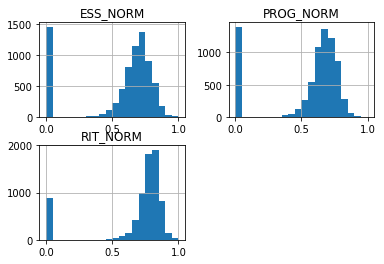

In [176]:
df[['PROG_NORM', 'ESS_NORM', 'RIT_NORM']].hist(bins=20)

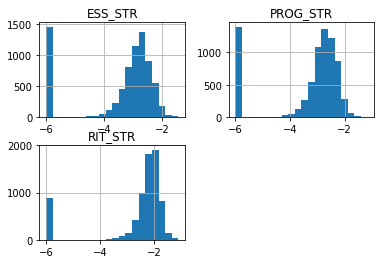

In [177]:
df[['ESS_STR','PROG_STR','RIT_STR']].hist(bins=20)
plt.show()

In [178]:
df.to_pickle(filepath)